# A Toxicology Experiment on the Death of Beetles
### by Diana Gerardo Fall 2018
## A Frequentist Approach

In [418]:
import numpy
import pandas
import math
import statsmodels.api as statmodels
import seaborn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [419]:
dat = {'log_dose': [1.6907,1.7242,1.7552,1.7842,1.8113,1.8369,1.8610,1.8839], 
       'beetles': [59,60,62,56,63,59,62,60],
       'num_died': [6,13,18,28,52,53,61,60] }
beetles = pandas.DataFrame(data=dat)

**1)** The following table reports results from a toxicological experiment, including the number of beetles killed $(y_i)$ after 5 hours exposure to gaseous carbon disulphide at various concentrations. Concentration $(\text{log dose}, x_i)$ is given on the $\text{log}_{10}$ scale.

In [420]:
beetles

,log_dose,beetles,num_died
0,1.6907,59,6
1,1.7242,60,13
2,1.7552,62,18
3,1.7842,56,28
4,1.8113,63,52
5,1.8369,59,53
6,1.8610,62,61
7,1.8839,60,60


Consider a binomial response distribution, and assume that the $y_i$ are independent realizations from $\text{Bin}(m_i; \pi_i)$, $i = 1,...,n$. The objective is to study the effect of the choice of link function $g(\cdot)$, where $\pi_i = g^{-1}(\eta_i)=g^{-1}(\beta_1 + \beta_2 x_i)$
    
**a)** Using R, fit 3 binomial GLMs to these data corresponding to 3 link functions, logit, probit and complementary log-log. Perform residual analysis for each model, using the deviance residuals. Obtain fitted values $\hat{\pi}_i$, under each model and compare with the observed proportions, $y_i/m_i$. Obtain the estimated dose-response curve under each model by evaluating $\hat{\pi}_i = g^{-1}(\beta_1 + \beta_2 x_i)$ over a grid of values $x$ for $\text{log dose}$ in the interval $(1.65, 1.9)$. Plot these curves and compare with the scatter plot of the observed $x_i$ plotted against the observed proportions. Based on all the results above, discuss the fit of the different models. 

**Solution:**

I have 3 binomial glms: Model 1 has a logit link function, Model 2 has a probit link funciton, and Model 3 has a complementary log-log link function. 

In [421]:
response_variable = beetles['num_died']/beetles['beetles']
beetles['intercept'] = numpy.repeat(1, len(beetles))
covariates = beetles[['intercept','log_dose']]
weights = beetles['beetles']

logit_link = statmodels.families.links.logit()
probit_link = statmodels.families.links.probit()
cloglog_link= statmodels.families.links.cloglog()

links = [logit_link, probit_link, cloglog_link]
link_names = ["Logit", "Probit", "Cloglog"]

In [422]:
# arrays = ( numpy.repeat(1, len(beetles))[:, None], beetles[['log_dose']].values )
# covariates =  numpy.concatenate(arrays, axis = 1 )

In [423]:
def beetle_BinGLM_fit_process(y, x, links, w, link_names):
    models = [0,0,0]
    models_results = [0,0,0]
    
    for i in range(len(links)):
        models[i] = statmodels.GLM(y, x, family = statmodels.families.Binomial(link = links[i]), var_weights=numpy.asarray(w))
        models_results[i] = models[i].fit()
        
        print(link_names[i])
        print(models_results[i].summary2())
        print("")
    
    return (models, models_results)

In [424]:
model,model_result = beetle_BinGLM_fit_process(response_variable, covariates, links, weights, link_names)

Logit
              Results: Generalized linear model
Model:              GLM              AIC:            263.6568
Link Function:      logit            BIC:            -1.2444 
Dependent Variable: y                Log-Likelihood: -129.83 
Date:               2021-04-28 12:43 LL-Null:        -266.31 
No. Observations:   8                Deviance:       11.232  
Df Model:           1                Pearson chi2:   10.0    
Df Residuals:       6                Scale:          1.0000  
Method:             IRLS                                     
-------------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------
intercept -60.7175   5.1807 -11.7199 0.0000 -70.8715 -50.5634
log_dose   34.2703   2.9121  11.7681 0.0000  28.5626  39.9780


Probit
              Results: Generalized linear model
Model:              GLM              AIC:            262.5444
Link Function:      p

I compare the Residual Deviance value between each model. The model with the lowest residual deviance is the model that best fits the data. Looking at each summary, our cloglog model has the lowest residual deviance value of approx. 3.4 indicating a binomial glm with a complementary log-log (cloglog) link function best fits the data. I also expect to see this in my following residual deviance plots. 

In [425]:
def beetles_residual_plot(m, link_names):
    for i in range(len(link_names)): 
        seaborn.scatterplot(x = m[i].fittedvalues ,y = m[i].resid_deviance, 
                    color = "brown" ).set(ylabel='residual deviance', xlabel ="fitted values", 
                                          title = f"{link_names[i]} Model Residual Deviance")
        plt.axhline(1, color = 'black', ls = '--', lw = 1)
        plt.axhline(-1, color = 'black', ls = '--', lw = 1)
        plt.show()

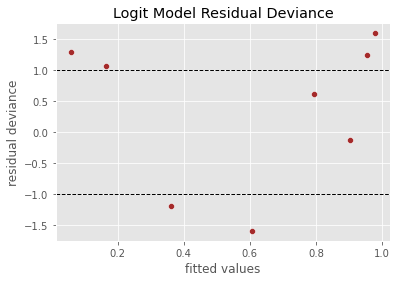

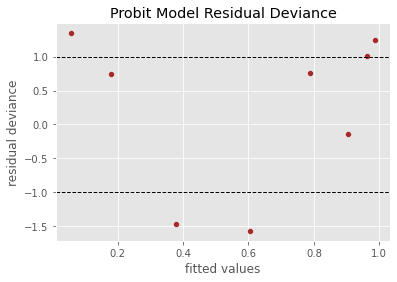

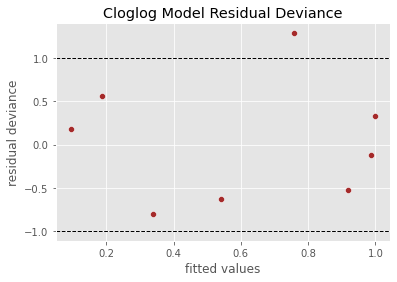

In [426]:
beetles_residual_plot(model_result, link_names)

Looking at the deviance residuals plot for Cloglog Model has the least outliers, 1 outlier. Whereas the Logit Model has 6 outliers and the Probit Model has 4 outliers This suggests that the binomial glm with a complementary log-log link function is a good fit to any observed proportion of beetles killed in its total population.

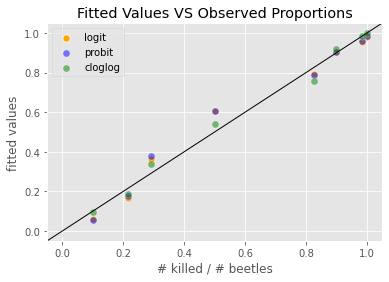

In [427]:
seaborn.scatterplot(x = response_variable, y = model_result[0].fittedvalues,
                    color = 'orange', s = 50, label = "logit" ).set(
xlabel = "# killed / # beetles", ylabel = "fitted values", title = "Fitted Values VS Observed Proportions" )
seaborn.scatterplot(x = response_variable, y = model_result[1].fittedvalues,
                    alpha = .5, color = 'blue', s = 50, label = "probit")
seaborn.scatterplot(x = response_variable, y = model_result[2].fittedvalues,
                    alpha = .5, color = 'green', s = 50, label = "cloglog")
plt.axline((0,0), xy2=None, slope = 1, color = "black", linewidth = 1)
plt.show()

In the fitted vs observed proportions plot, the cloglog points (labeled as crosses) are closer to the solid line (the line with slope 1, intercept=0), showing us again that choosing the cloglog link function for building our binomial glm is best.

In [428]:
xx = numpy.linspace(start=1.65, stop=1.9, num=100)
Xnew = statmodels.add_constant(xx)
Xnew = pandas.DataFrame(Xnew)
Xnew.columns = ["intercept","log_dose"]

In [429]:
logit_preds = model_result[0].predict(Xnew)
probit_preds = model_result[1].predict(Xnew)
cloglog_preds = model_result[2].predict(Xnew)

In [430]:
model_preds = [logit_preds, probit_preds, cloglog_preds]

In [431]:
def beetle_lineplot(newdata, predictions, color, link_names, response_var, predictor_var):
    for i in range(len(link_names)):
        seaborn.lineplot(x = newdata, y = predictions[i], color = color[i], label = link_names[i])
    
    seaborn.scatterplot(x = predictor_var, y = response_var, color = "black", label = "data").set(
        title = "Estimated Dose-Response Curve Under Each Model", ylabel ="# killed / # beetles")

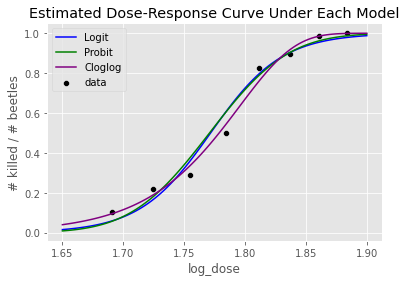

In [432]:
beetle_lineplot(xx, model_preds, ["blue", "green", "purple"], link_names, response_variable, beetles["log_dose"])

In the dose-response curve, note that the data points is the scatterplot of observed proportions vs log dose from the original dataset and we want to choose the curve that best fits these points. And we see that the cloglog curve (purple) matches the data best. Thus, I conclude that the using cloglog link function produces the best-fitting binomial glm.

**b)** One of the more general (parametric) link functions for binomial GLMs that has been suggested in the literature is defined through
$$g_{\alpha}^{-1}(\eta_i)=\frac{\text{exp}(\alpha\eta_i)}{[1+ \text{exp}(\eta_i)]^\alpha}$$
Note that the logit link arises as a special case of $g_{\alpha}^{-1}(\eta_i)$ when $\alpha=1$. Discuss the effect of the
additional model parameter $\alpha$, in particular, for values $0 < \alpha < 1$ and $\alpha> 1$. Provide the expression for the log-likelihood for $\beta_1$, $\beta_2$ and $\alpha$ under the link in $g_{\alpha}^{-1}(\eta_i)$, and discuss the complications that arise for maximum likelihood estimation under this more general model compared with the logit GLM. (You do not need to fit the model, estimates are given in part c.)

**Solution:**

The likelihood function is 

\begin{aligned}f(y_{i}|m_{i},\pi(x_{i})) & =\prod_{i=1}^{8}\binom{m_{i}}{y_{i}}\pi(x_{i})^{y_{i}}\left(1-\pi(x_{i})\right)^{m_{i}-y_{i}}\\
 & =\prod_{i=1}^{8}\binom{m_{i}}{y_{i}}\left(\frac{\pi(x_{i})}{1-\pi(x_{i})}\right)^{y_{i}}\left(1-\pi(x_{i})\right)^{m_{i}}
\end{aligned}

So the log likelihood is

\begin{aligned}l(y_{i}|m_{i},\pi(x_{i})) & =\sum_{i=1}^{8}\left[\log\binom{m_{i}}{y_{i}}+y_{i}\log\left(\frac{\pi(x_{i})}{1-\pi(x_{i})}\right)+m_{i}\log\left(1-\pi(x_{i})\right)\right]\end{aligned}

where 

\begin{aligned}\pi(x_{i}) & =\frac{\exp\left\{ \alpha(\beta_{1}+\beta_{2}x_{i})\right\} }{\left\{ 1+\exp(\beta_{1}+\beta_{2}x_{i})\right\} ^{\alpha}}\\
\log\left(\frac{\pi(x_{i})}{1-\pi(x_{i})}\right) & =\alpha(\beta_{1}+\beta_{2}x_{i})\\
\log\left(1-\pi(x_{i})\right) & =-\alpha\log\left\{ 1+\exp(\beta_{1}+\beta_{2}x_{i})\right\} 
\end{aligned}

The loglikehood under the link function $g_{\alpha}^{-1}(\eta_i)$ is now

\begin{aligned}l(y_{i}|m_{i},\pi(x_{i})) & =\sum_{i=1}^{8}\left[\log\binom{m_{i}}{y_{i}}+y_{i}\alpha(\beta_{1}+\beta_{2}x_{i})-m_{i}\alpha\log\left\{ 1+\exp(\beta_{1}+\beta_{2}x_{i})\right\} \right]\end{aligned}

For large $\alpha$ values (that is $\alpha>1$), the $\pi(x_{i})$'s
will approach zero. For $\alpha$ values between 0 and 1 ($0<\alpha<1$),
it will increase the value of each $\pi(x_{i})$. I notice that in
binomial regression, this link function  $g_{\alpha}^{-1}(\eta_i)$ is no longer the canonical
link function. So, Fisher's scoring method cannot be used to estimate
the model parameters. Newton-Raphson method may be used to estimate
the parameters, but convergence will be very slow.

**c)** The MLEs under the model with link $g_{\alpha}^{-1}(\eta_i)$ are $\hat{\beta}_{1}=-113.625$,
$\hat{\beta}_{2}=62.5$ and $\hat{\alpha}=0.279$. (The MLEs can be
obtained using the Newton-Raphson method.) Using these estimates,
obtain the fitted values $\hat{\pi}_{i}$ and the estimated dose-response
curve under the link $g_{\alpha}^{-1}(\eta_i)$. Compare with the corresponding results under
the 3 models in part (a). Obtain the deviance residuals from the model
with link $g_{\alpha}^{-1}(\eta_i)$ and analyze them graphically.

**Solution:**

In [433]:
def modified_logit_link_function(covariates, beta, alpha):
    eta = covariates @ beta
    value = numpy.zeros(shape = len(covariates))
    for i in range(len(covariates)):
        value[i] = math.exp(alpha*eta[i]) / (1 + math.exp(eta[i]))**alpha
    
    return value

def modified_logit_deviance_residuals(covariates, obs_denom, obs_numer, beta_hat, alpha_hat):
    p_hat = modified_logit_link_function(covariates, beta_hat, alpha_hat)
    m = obs_denom
    y_hat = p_hat*m
    y_obs = obs_numer
    n = len(y_obs)
    deviance = numpy.sign(y_obs - y_hat) * numpy.sqrt(2*abs(y_obs*numpy.log(y_obs/y_hat) 
                                          + (m - y_obs)*numpy.log(1E-10+(m - y_obs)/(m - y_hat))))
    
    return (p_hat,deviance) 

In [434]:
beta_hat = [-113.625, 62.5]
alpha_hat = .279

In [435]:
modified_logit = modified_logit_link_function(Xnew, beta_hat, alpha_hat)

In [436]:
model_preds_new = [logit_preds, probit_preds, cloglog_preds, modified_logit]
link_names_new = ["logit", "probit", "cloglog", "modified logit"]

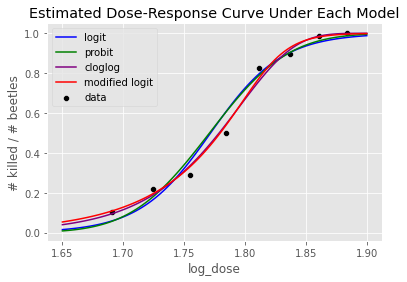

In [437]:
beetle_lineplot(xx, model_preds_new , ["blue", "green", "purple", "red"],
                link_names_new, response_variable, beetles["log_dose"])

In [438]:
modlogit_fitted, modlogit_resid = modified_logit_deviance_residuals(covariates, beetles["beetles"], beetles["num_died"],
                                                                    beta_hat, alpha_hat)

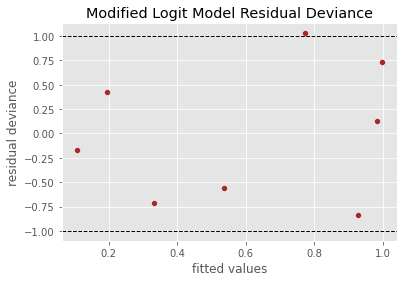

In [439]:
seaborn.scatterplot(x = modlogit_fitted ,y = modlogit_resid, color = "brown").set(
    ylabel='residual deviance', xlabel ="fitted values", title = "Modified Logit Model Residual Deviance")
plt.axhline(1, color = 'black', ls = '--', lw = 1)
plt.axhline(-1, color = 'black', ls = '--', lw = 1)
plt.show()

In the dose-response graph, I have now added a red
curve corresponding to the modified logit model. Notice that
it closely mimics the cloglog model's curve.
The deviance residuals for the binomial glm with the modified
logit link is shown above. Majority of the points are around
zero and there is only 1 possible outlier outside the (-1,1) band.

**d)** Compute the AIC and BIC for the 4 models considered above to compare.

**Solution:**

Note that the aic and bic in Python's stats.model's glm function differs from the glm aic/bic in Rstudio. That maybe because the optimizer being used is different. Python uses Iteratively Reweighted Least Squares (IRLS) and R uses Iteratively Weighted Least Squares. IRLS somehow inflates the aic/bic by about 222. 

So I compute each AIC individually with the following formula,
$$ \text{AIC} = 2K - 2 \ln(\hat{L}) $$
where $K$ is the number of parameters in the model and $\hat{L}$ is the maximized value of the binomial likelihood funcion. Recall that I describe the binomial function as $\text{Bin}(y_i;m_i,\hat{\pi}_i)$ where $y_i$ is the number or dead beetles, $m_i$ is the number of beetles, and $\hat{\pi}_i$ are the fitted values under the binomial glm model with my choice of link function.

In [440]:
def logchoose(n,k):
    value = numpy.zeros(shape = len(n))
    for i in range(len(n)):
        value[i] = math.lgamma(n[i]+1) - math.lgamma(k[i]+1) - math.lgamma(n[i]-k[i]+1)
    return value

def binomial_glm_aic(n, k, covs, fitted, num_params):
    m = n
    y = k
    J = num_params
    p_hat = fitted
    inside_sum = logchoose(m, y) + y*numpy.log(p_hat) + (m-y)*numpy.log(1-p_hat)
    
    return 2 * J - 2 * numpy.sum(inside_sum)

def print_aic(n,k,covs, fitted_list, numpara_list, model_names):
    for i in range(len(numpara_list)):
        print(model_names[i])
        print (binomial_glm_aic(n, k, covs, fitted_list[i], numpara_list[i]) )
        print("")

In [441]:
fit_vals = [model_result[0].fittedvalues, model_result[1].fittedvalues, 
            model_result[2].fittedvalues,  modlogit_fitted]
num_par = [2,2,2,3]

In [442]:
print_aic(beetles["beetles"], beetles["num_died"], covariates, fit_vals, num_par, link_names_new)

logit
41.43026931451174

probit
40.31779633010481

cloglog
33.64447695011687

modified logit
35.54659814549272



The model with the lowest AIC value is the model that best fits the data. I compare the values above and see that binomial glm model with a cloglog link function performs best.

I also compute each BIC with the following formula,
$$ \text{BIC} = \ln(n)K - 2\ln(\hat{L}) $$
where $n$ is the number of observations.

In [443]:
def binomial_glm_bic(n, k, covs, fitted, num_params):
    num_obs = len(n)
    m = n
    y = k
    J = num_params
    p_hat = fitted
    inside_sum = logchoose(m, y) + y*numpy.log(p_hat) + (m-y)*numpy.log(1-p_hat)
    
    return numpy.log(num_obs) * J - 2 * numpy.sum(inside_sum)

def print_bic(n,k,covs, fitted_list, numpara_list, model_names):
    for i in range(len(numpara_list)):
        print(model_names[i])
        print (binomial_glm_bic(n, k, covs, fitted_list[i], numpara_list[i]) )
        print("")

In [444]:
print_bic(beetles["beetles"], beetles["num_died"], covariates, fit_vals, num_par, link_names_new)

logit
41.58915239787141

probit
40.47667941346448

cloglog
33.803360033476544

modified logit
35.78492277053223



The model with the lowest AIC value is the model that best fits the data. I compare the values above and see that binomial glm model with a cloglog link function performs best.